In [1]:
#!/usr/bin/env python
# coding: utf-8

import enlighten
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

from os.path import join, exists
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import Normalizer, StandardScaler

from scipy.stats import pearsonr, pointbiserialr, spearmanr, ttest_ind, chi2_contingency
from sklearn.cluster import SpectralBiclustering
#from utils import jili_sidak_mc, plot_brains, assign_region_names
#from sklearn.linear_model import LinearRegression

from nilearn import datasets, surface, plotting
import nibabel as nib

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
sns.set(style='white', context='poster')
plt.rcParams["font.family"] = "Avenir Next Condensed"
#plt.rcParams["font.weight"] = "ultralight"
#plt.rcParams['font.monospace'] = 'Courier New'


PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_vbgmm/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [3]:
siemens = join(PROJ_DIR, OUTP_DIR, 'kmeans-SIEMENS_best-models-2023-07-21.csv')
ge = join(PROJ_DIR, OUTP_DIR, 'kmeans-GE MEDICAL SYSTEMS_best-models-2023-07-21.csv')
philips = join(PROJ_DIR, OUTP_DIR, 'kmeans-Philips Medical Systems_best-models-2023-07-21.csv')

siemens_df = pd.read_csv(siemens, index_col=0, header=0)
ge_df = pd.read_csv(ge, index_col=0, header=0)
philips_df = pd.read_csv(philips, index_col=0, header=0)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_vbgmm/output/kmeans-SIEMENS_best-models-2023-07-21.csv'

In [21]:
siemens_df

,algorithm,copy_x,init,max_iter,n_clusters,n_init,random_state,tol,verbose,clusters,davies_bouldin,silhouette,calinski_harabasz
2 0,auto,True,k-means++,1000,2,100,NaN,0.0001,0,2,2.452155,0.131965,319.311763
3 0,auto,True,k-means++,1000,3,100,NaN,0.0001,0,3,2.975279,0.093916,212.947642
4 0,auto,True,k-means++,1000,4,100,NaN,0.0001,0,4,2.918509,0.078055,172.951529
5 0,auto,True,k-means++,1000,5,100,NaN,0.0001,0,5,2.933031,0.076973,145.047226
6 0,auto,True,k-means++,1000,6,100,NaN,0.0001,0,6,3.145113,0.053934,125.846436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5 99,auto,True,k-means++,1000,5,100,NaN,0.0001,0,5,2.933685,0.077245,145.044358
6 99,auto,True,k-means++,1000,6,100,NaN,0.0001,0,6,3.144654,0.052706,125.851917
7 99,auto,True,k-means++,1000,7,100,NaN,0.0001,0,7,3.084654,0.049948,111.977865
8 99,auto,True,k-means++,1000,8,100,NaN,0.0001,0,8,2.999732,0.047049,100.742511


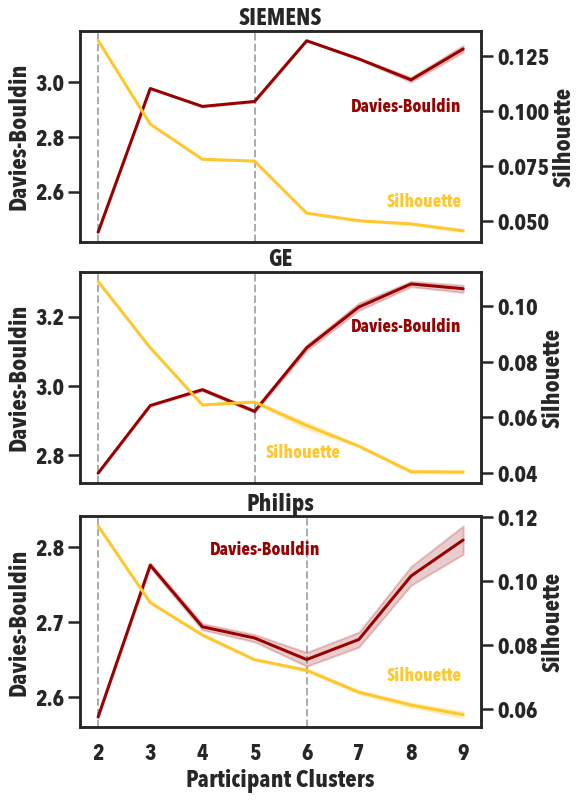

In [23]:
fig,ax = plt.subplots(
    #ncols=2, 
    nrows=3, 
    figsize=(8,11), 
    layout='constrained',
    sharex=True
)
# Siemens
# participants
g = sns.lineplot(
    x='n_clusters', 
    y='davies_bouldin', 
    data=siemens_df, 
    ax=ax[0], 
    color='#990000',
    errorbar=('ci', 99)
    
)

ax3 = plt.twinx(ax[0])
h = sns.lineplot(
    x='n_clusters', 
    y='silhouette', 
    data=siemens_df, 
    ax=ax3, 
    color='#FFC72C',
    errorbar=('ci', 99)
)

g.set_ylabel('Davies-Bouldin')
h.set_ylabel('Silhouette')
ax[0].set_xlabel('Participant Clusters')
ax[0].set_title('SIEMENS')
ax[1].set_title('GE')
ax[0].set_xticks(list(range(2,15)))



# GE

# participants
g = sns.lineplot(
    x='n_clusters', 
    y='davies_bouldin', 
    data=ge_df, 
    ax=ax[1], 
    color='#990000',
    errorbar=('ci', 99)
    
)

ax6 = plt.twinx(ax[1])
h = sns.lineplot(
    x='n_clusters', 
    y='silhouette', 
    data=ge_df, 
    ax=ax6, 
    color='#FFC72C',
    errorbar=('ci', 99)
)

g.set_ylabel('Davies-Bouldin')
h.set_ylabel('Silhouette')
ax[1].set_xlabel('Participant Clusters')

# philips
# participants
g = sns.lineplot(
    x='n_clusters', 
    y='davies_bouldin', 
    data=philips_df, 
    ax=ax[2], 
    color='#990000',
    errorbar=('ci', 99)
    
)

ax3 = plt.twinx(ax[2])
h = sns.lineplot(
    x='n_clusters', 
    y='silhouette', 
    data=philips_df, 
    ax=ax3, 
    color='#FFC72C',
    errorbar=('ci', 99)
)

g.set_ylabel('Davies-Bouldin')
h.set_ylabel('Silhouette')
ax[2].set_xlabel('Participant Clusters')
ax[2].set_title('Philips')
#ax[2].set_xticks(list(range(2,20)))


ax[0].text(0.95, 0.6, 'Davies-Bouldin',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[0].transAxes,
        color='#990000', fontsize=18)
ax[0].text(0.95, 0.15, 'Silhouette',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[0].transAxes,
        color='#FFC72C', fontsize=18)


ax[1].text(0.95, 0.7, 'Davies-Bouldin',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[1].transAxes,
        color='#990000', fontsize=18)
ax[1].text(0.65, 0.1, 'Silhouette',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[1].transAxes,
        color='#FFC72C', fontsize=18)

ax[2].text(0.6, 0.8, 'Davies-Bouldin',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[2].transAxes,
        color='#990000', fontsize=18)
ax[2].text(0.95, 0.2, 'Silhouette',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax[2].transAxes,
        color='#FFC72C', fontsize=18)

ax[0].axvline(2, lw=2, ls='--', color='#333333', alpha=0.4)
ax[1].axvline(2, lw=2, ls='--', color='#333333', alpha=0.4)
ax[2].axvline(2, lw=2, ls='--', color='#333333', alpha=0.4)

ax[1].axvline(5, lw=2, ls='--', color='#333333', alpha=0.4)
ax[2].axvline(6, lw=2, ls='--', color='#333333', alpha=0.4)
ax[0].axvline(5, lw=2, ls='--', color='#333333', alpha=0.4)

#fig.savefig(join(PROJ_DIR, FIGS_DIR, 'sbc-dbs_metrics.png'), bbox_inches='tight', dpi=600)